<a href="https://colab.research.google.com/github/sang6eeta/first_project/blob/master/Potato_Plant_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'potato-plant-diseases-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5082145%2F8538683%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240715%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240715T140720Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8f9fcc02235f8aae417ac7cb9db0a9d8341ea6d6c4b0ed14ac31b587d40f890e0336936e078048f52139e1f8712d8688624c85d00e53d94ea25dd9caa6312566fc039623ed9fc20235f600cee6955997f8afd0d1d30e12c74de61e2a2d9276df9b0e02df8a7db63398dd45b802e7cf6be2508e1ce4eda18b23144b5de8f238a6c0117d78e291b5c9d49c069a11b85da9c5301525f5b36f91dfad6a1bbf42c916444e52b442ef4d7121e352e1eb45588c3854b609b9b2ba194546842f3ddfc05660a0793eaac5995db752fb25e59eb47679ce58cd1e8e943b39d61f7753066b0a87efe7fc046cfa9f188e156cddf1c697a16c848140da3b8bc1e6c20d3eb04412'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 79423158 bytes downloaded
Downloaded and uncompressed: potato-plant-diseases-data
Data source import complete.


In [29]:
import torch
import numpy as np
import os
import random
from PIL import Image
import torch.nn as nn
from torchvision  import datasets,transforms
from torch.utils.data import DataLoader,random_split
import matplotlib.pyplot as plt


**Preparing Datasets**

In [30]:
# Set default device based on GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Default device set to {device}")

data_path = "/kaggle/input/potato-plant-diseases-data/"
# load datasets with ImageFolder
dataset = datasets.ImageFolder(data_path)


# Split the datasets into training ,validation ,and test sets
train_size = int(0.8*len(dataset))
val_size = int(0.1*len(dataset))
test_size = len(dataset)-train_size-val_size

# Initialize a generator on the GPU
generator = torch.Generator(device=device)

# Split using the GPU generator
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size], generator=generator)


#calculate the number of samples in each dataset
train_size = len(train_dataset)
val_size = len(val_dataset)
test_size = len(test_dataset)

print(f"Number of Samples in training set:{train_size}")
print(f"Number of Samples in validation set:{val_size}")
print(f"Number of Samples in test set:{test_size}")

#Define transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((256,256)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ]),
    'val': transforms.Compose([
        transforms.Resize((256,256)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ]),

    'test': transforms.Compose([
        transforms.Resize((256,256)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
}


# Apply appropriate transforms to each split
train_dataset.dataset.transform = data_transforms['train']
val_dataset.dataset.transform = data_transforms['val']
test_dataset.dataset.transform = data_transforms['test']


Default device set to cuda
Number of Samples in training set:3443
Number of Samples in validation set:430
Number of Samples in test set:431


**Create DataLoaders**

In [31]:
# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=30, shuffle=True, generator=generator) # Pass the generator to the DataLoader
val_loader = DataLoader(val_dataset, batch_size=30, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=30, shuffle=False)


Image batch dimensions: torch.Size([30, 3, 256, 256])
Image label dimensions: torch.Size([30])


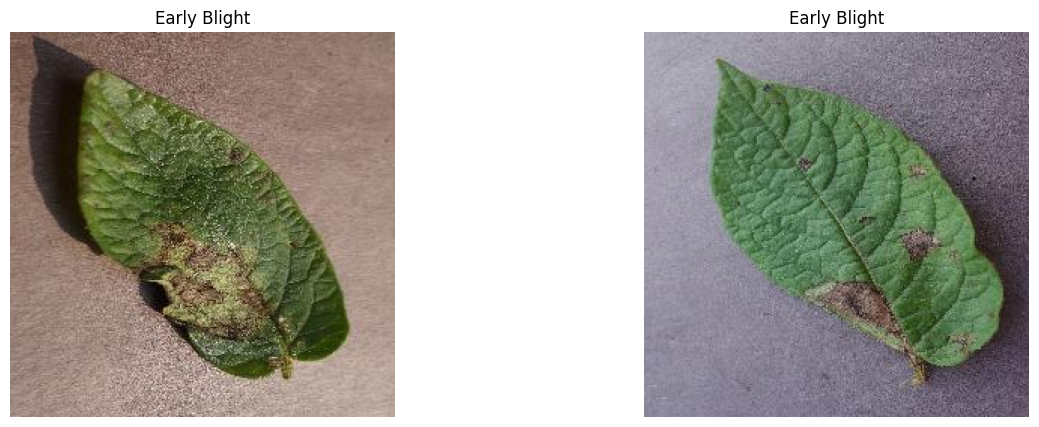

In [32]:

# Define a function to display images with labels
def show_images_labels(images, labels, label_names):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for i, ax in enumerate(axes):
        # Convert image tensor to numpy array and transpose
        image = images[i].numpy().transpose((1, 2, 0))
        ax.imshow(image)
        ax.set_title(label_names[labels[i].item()])
        ax.axis('off')
    plt.show()

# Assuming label_names is a list that maps label indices to plant conditions
label_names = ["Early Blight","Late Blight","Healthy"]

# Get a batch of training data
images, labels = next(iter(train_loader))

# Show the size and shape of images
print(f"Image batch dimensions: {images.size()}")
print(f"Image label dimensions: {labels.size()}")

# Visualize some images with labels
show_images_labels(images[:2], labels[:2], label_names)



**Build Model**

In [44]:
class CNNModel(nn.Module):
    def __init__(self,num_classes):
        super().__init__()
        self.feature_extractor = nn.Sequential(
        nn.Conv2d(3,32,kernel_size=3,padding=1),
        nn.ELU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Conv2d(32,64,kernel_size=3,padding=1),
        nn.ELU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Conv2d(64,128,kernel_size=3,padding=1),
        nn.ELU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Conv2d(128,256,kernel_size=3,padding=1),
        nn.ELU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Flatten()
        )
        self.classifier = nn.Sequential(
            nn.Linear(256*16*16,512),
            nn.ELU(),
            nn.Dropout(0.5),
            nn.Linear(512,num_classes)
        )


    def forward(self,x):
        x=self.feature_extractor(x)
        x=self.classifier(x)
        return x

**Training and Validation**

In [45]:
import torch.optim as optim
Model = CNNModel(num_classes=3).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Model.parameters(),lr=1e-5)
num_epochs = 10

for epoch in range(num_epochs):
    Model.train()
    running_loss = 0.0
    for images,labels in train_loader:
        # Move images and labels to the same device as the model
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = Model(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")


Epoch 1/10, Loss: 0.7237710237503052
Epoch 2/10, Loss: 0.7050451112830121
Epoch 3/10, Loss: 0.7070377728213435
Epoch 4/10, Loss: 0.707494838859724
Epoch 5/10, Loss: 0.703713147536568
Epoch 6/10, Loss: 0.704437776233839
Epoch 7/10, Loss: 0.7021719155104263
Epoch 8/10, Loss: 0.701779946555262
Epoch 9/10, Loss: 0.6989552606707033
Epoch 10/10, Loss: 0.6979040695273357


**Validation of Model**

In [47]:
import torch
# Validation loop
Model.eval()
val_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = Model(images)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Validation Loss: {val_loss/len(val_loader)}, Accuracy: {100 * correct / total}%")

Validation Loss: 0.698877998193105, Accuracy: 45.58139534883721%


**Evaluation of Model**

Test Accuracy: 45.475638051044086%


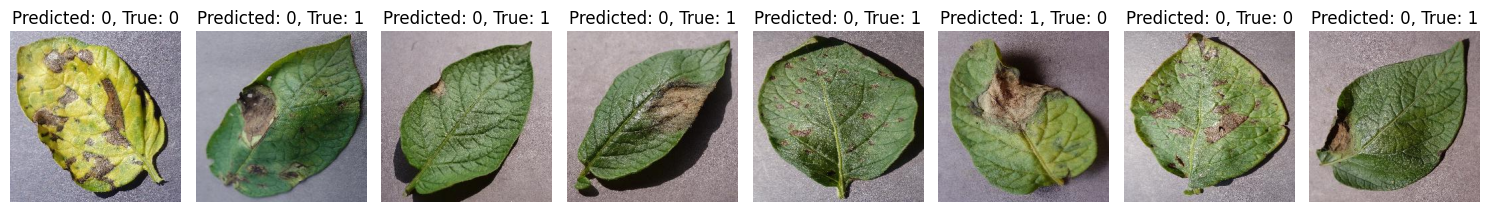

In [50]:
import matplotlib.pyplot as plt
Model.eval()

correct = 0
total = 0
predicted_labels = []
true_labels = []
images_list = []

# Function to display images with predictions
def imshow(img, ax, title=None):
  # Move the image to CPU before converting to NumPy
    npimg = img.cpu().numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    if title:
        ax.set_title(title)
    ax.axis('off')

# Disable gradient calculation
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = Model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Collect images, predicted and true labels for visualization
        images_list.append(images)
        predicted_labels.extend(predicted)
        true_labels.extend(labels)

print(f"Test Accuracy: {100 * correct / total}%")

# Plot a few test images with their predictions
num_images_to_show = 8
fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 15))
for i in range(num_images_to_show):
    img = images_list[0][i].cpu()  # Taking images from the first batch # Move image to CPU before passing to imshow
    ax = axes[i]
    imshow(img, ax, title=f'Predicted: {predicted_labels[i]}, True: {true_labels[i]}')

plt.tight_layout()
plt.show()